<div class="alert alert-block alert-info" style="margin-top: 10px">
<H1 align='center'>California House Price Prediction - Regression</H1>
</div>

<h2>Table of Contents </h2>

<div class="alert alert-block alert-info" style="margin-top: 10px">
<ul>
    <li><a href="#data_acquisition">Data Acquisition</a>
        <ul>
            <li><a href="#check_for_nulls">Check for Null Values</a></li>
        </ul>
    </li>
    <li><a href="#basic_insight">Basic Insight of a Data Set</a>
        <ul>
            <li><a href="#data_types">Data Types</a></li>
            <li><a href="#p_values">P-Values</a></li>
            <li><a href="#anova">ANOVA</a></li>
        </ul>
    </li>
    <li><a href="data_analysis">Data Analysis</a>
        <ul>
            <li><a href="#five_point_summary">Five Number Summary</a></li>
            <li><a href="#box plot">Box Plot</a></li>
            <li><a href="#multi_corr">Multi Collenearity</a></li>
            <li><a href="#pair_plot_diga_kde">Pair Plot with KDE Diagonal</a></li>
        </ul>
    </li>
    <li><a href='data_preprocessing'>Data Preprocessing</a>
        <ul>
            <li><a href='#encoding_categories'>Encoding Category Columns</a></li>
            <li><a href='#z_scaling'>Standard Scaling</a></li>
            <li><a href='#model_fitting'>Fitting The Model</a></li>
                <ul>
                    <li><a href="#model1_slr">Model #1. Simple Linear Regression</a></li>
                    <li><a href="#model2_mlr">Model #2. Multiple Linear Regression</a></li>
                    <li><a href="#model3_poly">Model #3. Ploynomial Regression</a></li>
                    <li><a href="#model4_dstr">Model #4. Decision Tree Regressor</a></li>
                    <li><a href="#model5_rfr">Model #5. Random Forest Regressor</a></li>
                </ul>
            <li><a href='#model_evaluate'>Model Evaluation</a></li>
        </ul>
    </li>
        
</ul>
</div>

<h1 id="data_acquisition">Data Acquisition</h1>
<ul>
    <li>data source: <a href="https://drive.google.com/file/d/11-8VDvH5cvOs02Rx5smMcWKIFAH1aVcX/view" target="_blank">https://drive.google.com/file/d/11-8VDvH5cvOs02Rx5smMcWKIFAH1aVcX/view</a></li>
    <li>data type: csv</li>
</ul>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the online file by the URL provides above, and assign it to variable "df"
df_house_prices = pd.read_excel('housing_dataset.xlsx')
print(df_house_prices.shape)
df_house_prices.head()

(20640, 10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

<h1 id="check_for_nulls">Check for Null Values</h1>  

In [3]:
df_house_prices.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

The column ***`total_bedrooms`*** has 207 null values. Before imputing the values lets check the distribution. If the distribution is symmetric we will go with the mean other wise median.

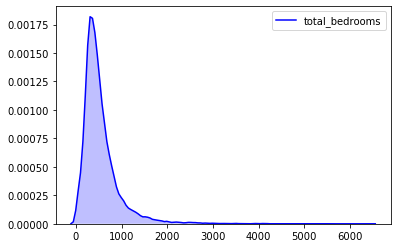

In [5]:
sns.kdeplot(df_house_prices.total_bedrooms, color='b', shade=True)
plt.show()

It is slightly right skewed distribution. So lets impute the null values for this column with Median.

In [6]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df_house_prices[['total_bedrooms']] = si.fit_transform(df_house_prices[['total_bedrooms']])
df_house_prices.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

<h1 id="basic_insight">Basic Insight of Dataset</h1>

<h2 id="data_types">Data Types</h2>

In [7]:
df_house_prices.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

***`ocean_proximity`*** is categorical variable. Lets check the values.

In [8]:
df_house_prices.ocean_proximity.value_counts().to_frame()

ocean_proximity
<1H OCEAN              9136
INLAND                 6551
NEAR OCEAN             2658
NEAR BAY               2290
ISLAND                    5

Lets check for the distribution of price relative to ocean_proximity

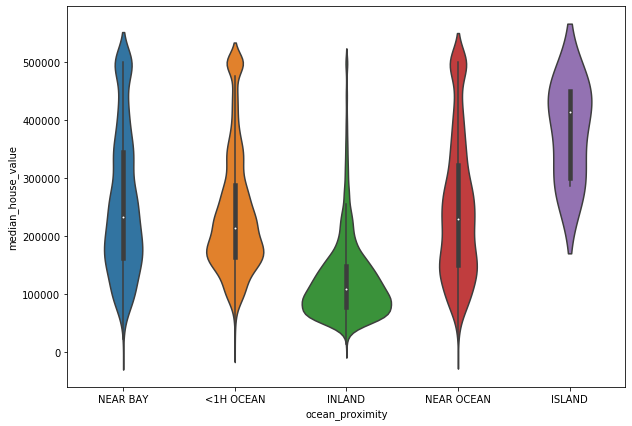

In [9]:
plt.figure(figsize = (10, 7))
sns.violinplot(x = 'ocean_proximity', y = 'median_house_value', data = df_house_prices)
plt.show()

#### Observations from the above violin plot.
Cleary the above violin plot shows the prices for the houses that are near ISLAND are very high and the price distribution for ISLAND is really sckewed on positive side.

Let's look at the mean price relative to the ocean_proximity.

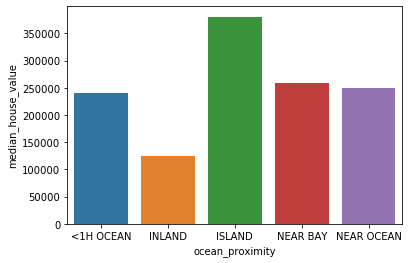

ocean_proximity  median_house_value
0       <1H OCEAN       240084.285464
1          INLAND       124805.392001
2          ISLAND       380440.000000
3        NEAR BAY       259212.311790
4      NEAR OCEAN       249433.977427

In [10]:
ocean_proximity_mean_prices = df_house_prices[['ocean_proximity', 'median_house_value']].groupby(['ocean_proximity'], as_index = False).mean()

# show the plot
sns.barplot(ocean_proximity_mean_prices.ocean_proximity, ocean_proximity_mean_prices.median_house_value)
plt.show()

ocean_proximity_mean_prices


From the above figure the average prices for houses in ISLANDs are very high.

In [11]:
df_house_prices

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_proximity  \
0             322         126         8.3252        NEAR BAY   
1            2401        1138         8.3014        NEAR BAY   
2             496         177         7.2574        NEAR BAY   
3             558         219         5.6431        NEAR BAY   
4             565         259         3.8462        NEAR BAY   
...           ...         ...            ...             ...   
20635         845         330         1.5603          INLAND   
20636         356         114         2.5568          INLAND   
20637        1007         433         1.7000          INLAND   
20638         741         349         1.8672          INLAND   
20639        1387         530         2.3886          INLAND   

       median_house_value  
0                  452600  
1                  358500  
2                  352100  
3                  341300  
4                  342200  
...                   ...  
20635               78100  
20636               77100  
20637               92300  
20638               84700  
20639               89400  

[20640 rows x 10 columns]

<h2 id="p_values">P-values</h2>

Let's find out the p-values for the correlation b/w every independent variable and the dependent variable just to check whether or not the correlation is `statistically significant`. Lets take the 95% confident, in other words the significance level alpha = 0.05

In [12]:
from scipy import stats

def p_stats(df, dv):
    """ returns a data frame of pearson correlation and p-value for every feature against the dependent variable.
    
    df The Pandas Data Frame With Independent Features and Dependent Feature
    dv The String which the name of the DV(Dependent Variable)
    """
    # split the data
    x = df.drop([dv, 'ocean_proximity'], axis = 1)
    y = df[dv]
    
    # find the corrleation b/w every element and the dependent variable
    coeffs = []
    p_values = []
    for column in x.columns:
        # correlation b/w x1, x2, x3, ... xn and y
        pearson_coef, p_value = stats.pearsonr(df[column], y)
        coeffs.append(pearson_coef)
        p_values.append(p_value)
    
    p_stats_df = pd.DataFrame(index = x.columns)
    p_stats_df['Pearson Corr Coeff'] = coeffs
    p_stats_df['P Value'] = p_values
    return p_stats_df

In [13]:
p_stats(df_house_prices, 'median_house_value')

Pearson Corr Coeff       P Value
longitude                    -0.045967  3.923322e-11
latitude                     -0.144160  2.939859e-96
housing_median_age            0.105623  2.761861e-52
total_rooms                   0.134153  1.689385e-83
total_bedrooms                0.049457  1.167146e-12
population                   -0.024650  3.976308e-04
households                    0.065843  2.823421e-21
median_income                 0.688075  0.000000e+00

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

From the above output, for all the independent variables the correlation with the dependent variable is statistically significant although the linear relationship is not that strong(as the linear realtionship shown by the pearson's correlation coefficent).


This is good result that all the independent variables seem to be good predictors.

<h2 id="anova">ANOVA</h2>

* ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

* we haven't checked the categorical variables and correlation among the categories in a categorical variable. And ANOVA comes in Handy.

* We have only one categorical variable which is `ocean_proximity` and now with ANOVA we are gonna get some insight of the feature `ocean_proximity`.



In [14]:
df_house_prices.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
# group by 'ocean_proximity'
df_group_ocean_proximity = df_house_prices[['ocean_proximity', 'median_house_value']].groupby(['ocean_proximity'])
df_group_ocean_proximity.head(2)

ocean_proximity  median_house_value
0           NEAR BAY              452600
1           NEAR BAY              358500
701        <1H OCEAN              431000
830        <1H OCEAN              217000
954           INLAND              315600
957           INLAND              323000
1850      NEAR OCEAN              109400
1851      NEAR OCEAN               85800
8314          ISLAND              450000
8315          ISLAND              414700

We can use get_group method to get the the a data of a particular category.

In [16]:
df_group_ocean_proximity.get_group('ISLAND')

ocean_proximity  median_house_value
8314          ISLAND              450000
8315          ISLAND              414700
8316          ISLAND              300000
8317          ISLAND              450000
8318          ISLAND              287500

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [17]:
# ANOVA

f_val, p_val = stats.f_oneway(df_group_ocean_proximity.get_group('NEAR BAY')['median_house_value'],
                              df_group_ocean_proximity.get_group('<1H OCEAN')['median_house_value'],
                              df_group_ocean_proximity.get_group('INLAND')['median_house_value'],
                              df_group_ocean_proximity.get_group('NEAR OCEAN')['median_house_value'],
                              df_group_ocean_proximity.get_group('ISLAND')['median_house_value']
                             )  
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 1612.1407358838217 , P = 0.0


This is a great result, with a large F test score showing a strong correlation and a P value of 0 implying a very certain statistical significance.
#### But does this mean all three tested groups are all this highly correlated?
**Ans:** *`We can't say it unless we check the score for each group separately.`* We have 5 groups in total. And we have to examine each other group. We will get total 10 combinations. Lets write a method for it.


In [18]:
def get_anova_stats(dataframe, groupby_col, dv):
    """This function performs the ANOVA test among the group gives the test results as a data frame containing\
    the f-value and p-value. Given a groupby column and dv(dependent variable) this method performs the ANOVA\
    for each group and its corresponding dependent variable.
    
    Parameters: 
    
    'dataframe': The Pandas DataFrame object
    'groupby_col': The column by which the group by should be applied
    'dv': The dependent variable on which the test to be made
    
    """
    df_group = dataframe[[groupby_col, dv]].groupby(groupby_col)
    # df_group_ocean_proximity = df_house_prices[['ocean_proximity', 'median_house_value']].groupby(['ocean_proximity'])
    # df_group_ocean_proximity.head(2)
    groups = df_group.count().index
    index = []

    Fs, Ps = [], []

    for i in range(len(groups) - 1):
        for j in range(i + 1, len(groups)):
            f_val, p_val = stats.f_oneway(df_group.get_group(groups[i])[dv], 
                                         df_group.get_group(groups[j])[dv])
            index.append('({} <==> {})'.format(groups[i], groups[j]))
            Fs.append(f_val)
            Ps.append(p_val)
            # print( "ANOVA results for group {}, {}:\tF=".format(groups[i], groups[j]), f_val, ",\tP =", p_val )
            
    df_anova_results = pd.DataFrame(index = index)
    df_anova_results['F-Value'] = Fs
    df_anova_results['P-Value'] = Ps
    df_anova_results.index.name = 'Ocean Proximity Groups'
    return df_anova_results

In [19]:
df_anova_stats = get_anova_stats(df_house_prices, 'ocean_proximity', 'median_house_value')
df_anova_stats

F-Value       P-Value
Ocean Proximity Groups                                
(<1H OCEAN <==> INLAND)      5891.498195  0.000000e+00
(<1H OCEAN <==> ISLAND)         8.742659  3.116459e-03
(<1H OCEAN <==> NEAR BAY)      55.697782  9.064892e-14
(<1H OCEAN <==> NEAR OCEAN)    14.869319  1.158342e-04
(INLAND <==> ISLAND)           66.603621  3.947123e-16
(INLAND <==> NEAR BAY)       4066.450385  0.000000e+00
(INLAND <==> NEAR OCEAN)     3757.669339  0.000000e+00
(ISLAND <==> NEAR BAY)          4.865534  2.749718e-02
(ISLAND <==> NEAR OCEAN)        5.714744  1.689216e-02
(NEAR BAY <==> NEAR OCEAN)      7.820956  5.184335e-03

In [20]:
# Get the groups that contain greate P-Values
df_anova_stats[df_anova_stats['P-Value'] > 0.05]

Empty DataFrame
Columns: [F-Value, P-Value]
Index: []

Good that no category in `ocean_proximity` has correlation among them. We checked here for 95% confidence.

Conclusion:
All the variables so far looked good from the P-Test and the Anova.
We checked the correlation using the pearson correlation coefficient and P-Values for continuous variables.
And Anova F-Value and P-Values for the categorical variable.
And all the test seemed good.

In [21]:
df_group_ocean_proximity.get_group('NEAR BAY')['median_house_value']

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
19067    297600
19068    208000
19069    262300
19077    213200
19104    246300
Name: median_house_value, Length: 2290, dtype: int64

<h1 id="data_analysis">Data Analysis</h1>

<h2 id="five_point_summary">Five Number Summary</h2>

In [22]:
df_house_prices.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20640.0     536.838857     419.391878      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         297.0000     435.0000     643.25000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

<h2 id="box_plot">Box Plot</h2>

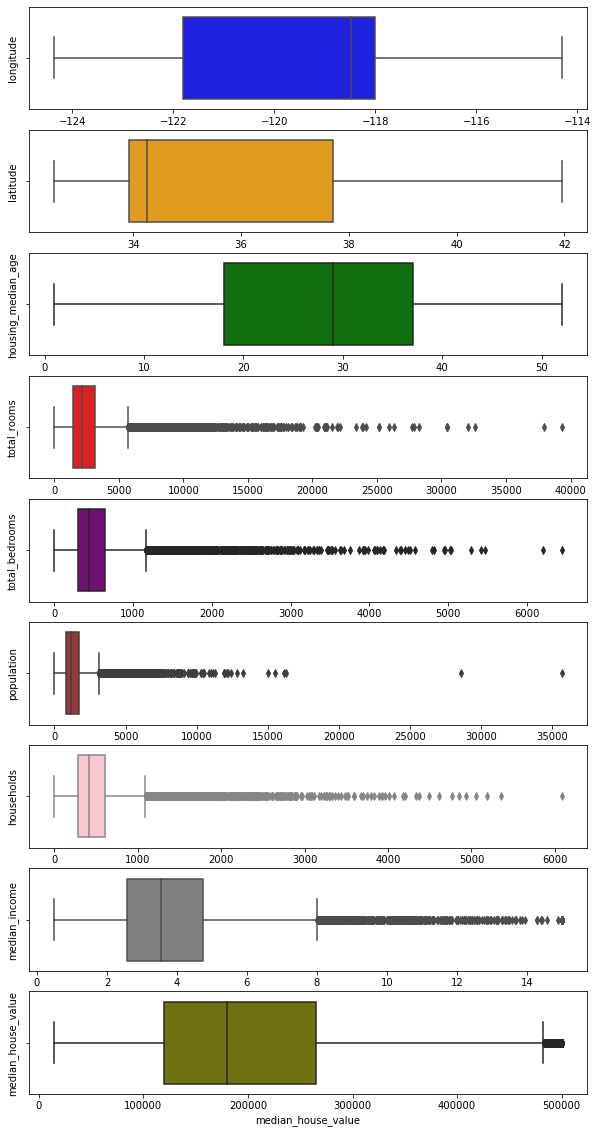

In [23]:
plt.figure(figsize = (10, 20))
columns = df_house_prices.drop(['ocean_proximity'], axis = 1).columns
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
color_indices = np.random.randint(0, len(colors), len(colors))
for i in range(len(columns)):
    plt.subplot(len(columns), 1, i + 1)
    sns.boxplot(df_house_prices[columns[i]], color = colors[i])
    plt.ylabel(columns[i])
plt.show()

We can see lot many outliers for the columns median_income, households, population, total_bedrooms, total_rooms.

<h2 id="multi_corr">Multi Collinearity</h2>

In [24]:
corr = df_house_prices.corr()
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773    0.055310      -0.015176   
latitude                 -0.066484   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.319026   -0.296244   -0.302916      -0.119034   
total_rooms               0.927058    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.873535    0.974366      -0.007617   
population                0.873535    1.000000    0.907222       0.004834   
households                0.974366    0.907222    1.000000       0.013033   
median_income            -0.007617    0.004834    0.013033       1.000000   
median_house_value        0.049457   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049457  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

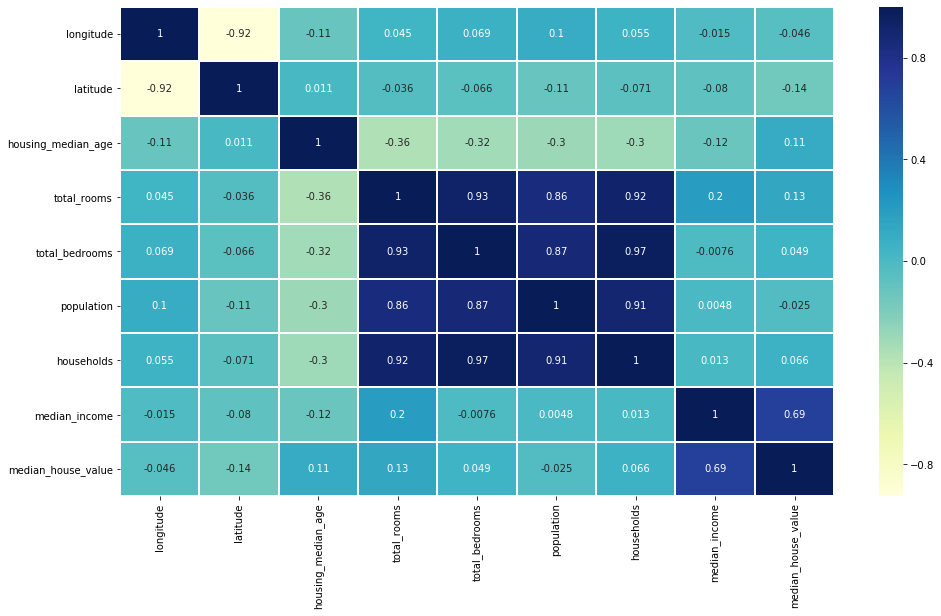

In [28]:
plt.figure(figsize = (16, 9))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', linewidth= 1)
plt.show()

There is high multicollinearity b/w the following pair of features.
1. `total_rooms` and `total_bedrooms`
2. `total_rooms` and `population`
3. `total_rooms` and `households`
4. `latitude` and `longitude`

Ideally, there should be no multicollinearity b/w the independent variables. And also there should be linear relationship b/w each independent variable alone and the dependent variable. But here it doesn't seem to be the case. Lets also check the pair plot with `diag_kind` as `kde` so that we can also see the distribution of that particular variable.

<Figure size 1152x648 with 0 Axes>

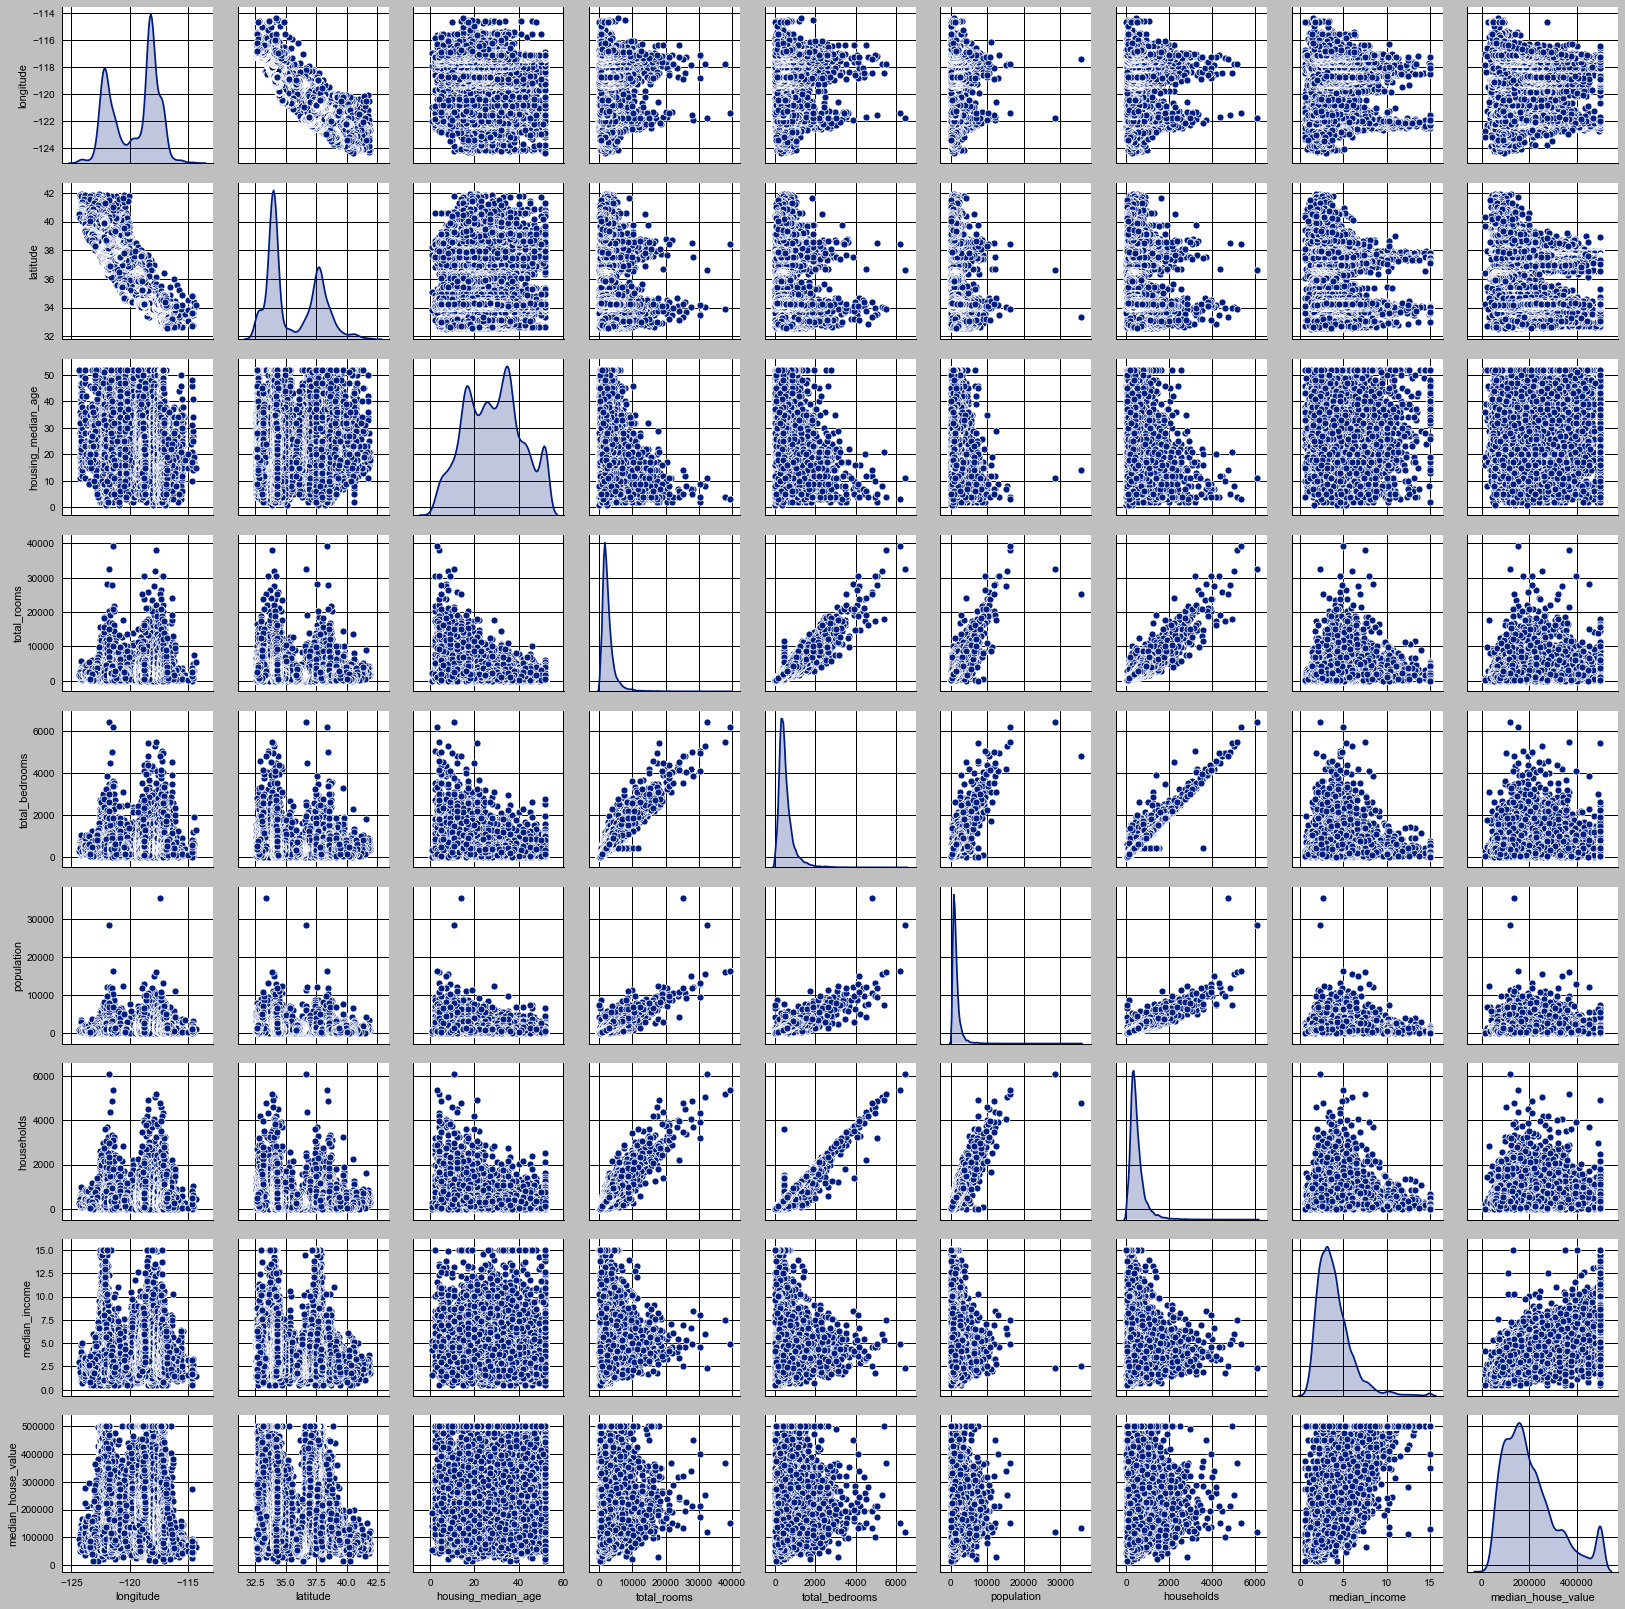

In [279]:
plt.figure(figsize = (16, 9))
sns.pairplot(df_house_prices, diag_kind = 'kde')
plt.show()

From the above pairplot, for `longitude` and `latitude` we can see along the diagonal, the distribution contains two gaussians. 
These may not be the good predictors. Also as seen from the heatmap there is multicollinearity among few  vairables that is shown in pairplot as well.

<h1 id='data_preprocessing'>Data Preprocessing</h1>

<h2 id='encoding_categories'>Encoding Category Columns</h2>

In [29]:
df_with_dummies = pd.get_dummies(df_house_prices, drop_first=True)
df_with_dummies.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

<h2 id="z_scaling">Standard Scaling</h2>

In [291]:
from sklearn.preprocessing import StandardScaler
columns = df_with_dummies.columns
z_scaler = StandardScaler()
df_standard = pd.DataFrame(z_scaler.fit_transform(df_with_dummies), columns = columns)
df_standard

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1      -1.322844  1.043185           -0.607019     2.045890        1.357143   
2      -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3      -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4      -1.337818  1.038503            1.856182    -0.462404       -0.612423   
...          ...       ...                 ...          ...             ...   
20635  -0.758826  1.801647           -0.289187    -0.444985       -0.388283   
20636  -0.818722  1.806329           -0.845393    -0.888704       -0.922403   
20637  -0.823713  1.778237           -0.924851    -0.174995       -0.123608   
20638  -0.873626  1.778237           -0.845393    -0.355600       -0.304827   
20639  -0.833696  1.750146           -1.004309     0.068408        0.188757   

       population  households  median_income  median_house_value  \
0       -0.974429   -0.977033       2.344766            2.129631   
1        0.861439    1.669961       2.332238            1.314156   
2       -0.820777   -0.843637       1.782699            1.258693   
3       -0.766028   -0.733781       0.932968            1.165100   
4       -0.759847   -0.629157      -0.012881            1.172900   
...           ...         ...            ...                 ...   
20635   -0.512592   -0.443449      -1.216128           -1.115804   
20636   -0.944405   -1.008420      -0.691593           -1.124470   
20637   -0.369537   -0.174042      -1.142593           -0.992746   
20638   -0.604429   -0.393753      -1.054583           -1.058608   
20639   -0.033977    0.079672      -0.780129           -1.017878   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                   -0.681889               -0.015566   
1                   -0.681889               -0.015566   
2                   -0.681889               -0.015566   
3                   -0.681889               -0.015566   
4                   -0.681889               -0.015566   
...                       ...                     ...   
20635                1.466514               -0.015566   
20636                1.466514               -0.015566   
20637                1.466514               -0.015566   
20638                1.466514               -0.015566   
20639                1.466514               -0.015566   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                      2.830742                   -0.384466  
1                      2.830742                   -0.384466  
2                      2.830742                   -0.384466  
3                      2.830742                   -0.384466  
4                      2.830742                   -0.384466  
...                         ...                         ...  
20635                 -0.353264                   -0.384466  
20636                 -0.353264                   -0.384466  
20637                 -0.353264                   -0.384466  
20638                 -0.353264                   -0.384466  
20639                 -0.353264                   -0.384466  

[20640 rows x 13 columns]

<h2 id="model_fitting">Fitting the Model</h2>

<h3 id="model1_slr">Model #1: Simple Linear Regression With One Variable</h3>

In [279]:
from sklearn.model_selection import train_test_split

X = df_with_dummies.drop(['median_house_value'], axis = 1)
y = df_with_dummies.median_house_value

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 12), (4128, 12), (16512,), (4128,))

#### `total_rooms` vs `median_house_value`

In [280]:
sx_train = x_train[['total_rooms']]
sx_test = x_test[['total_rooms']]

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(sx_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
def model_evaluate_dist_plot(actual, predicted):
    plt.figure(figsize = (16, 9))

    ax1 = sns.distplot(actual, hist = False, color = "r", label = "Actual Values")
    sns.distplot(predicted, hist = False, color = "b", label = "Fitted Values", ax = ax1)

    plt.title("Actual Vs Fitted Values for Price")
    plt.xlabel("Median house Price")
    plt.ylabel("Proportion of houses")
    plt.legend()

    plt.show()
    plt.close()

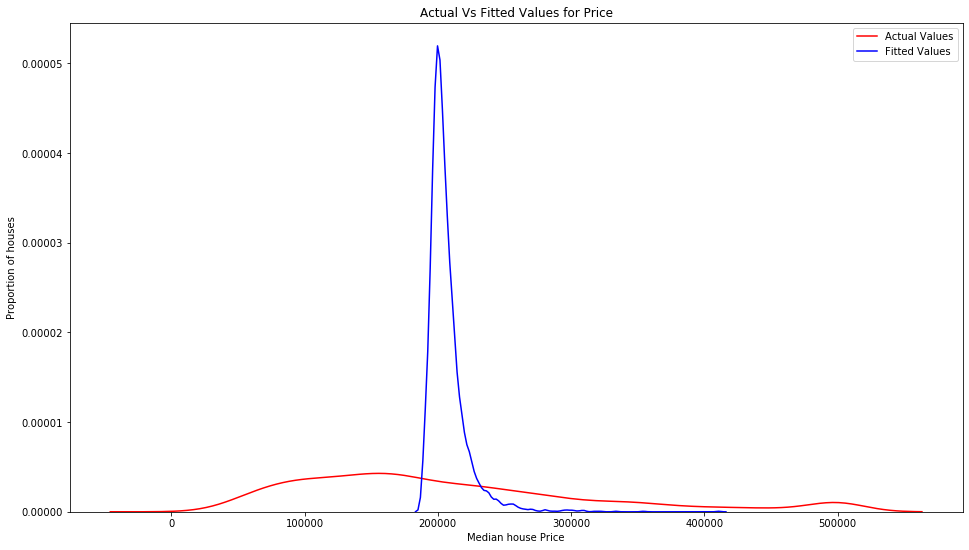

In [282]:
y_hat = lm.predict(sx_test)
model_evaluate_dist_plot(y_test, y_hat)

VERY BAD PREDICTION! No where near to the model. Lets look at the other predictor.

In [283]:
sx_train = x_train[['total_bedrooms']]
sx_test = x_test[['total_bedrooms']]

lm = LinearRegression()
lm.fit(sx_train, y_train)
print("The R-squared:", lm.score(sx_train, y_train))

The R-squared: 0.002379893558622559


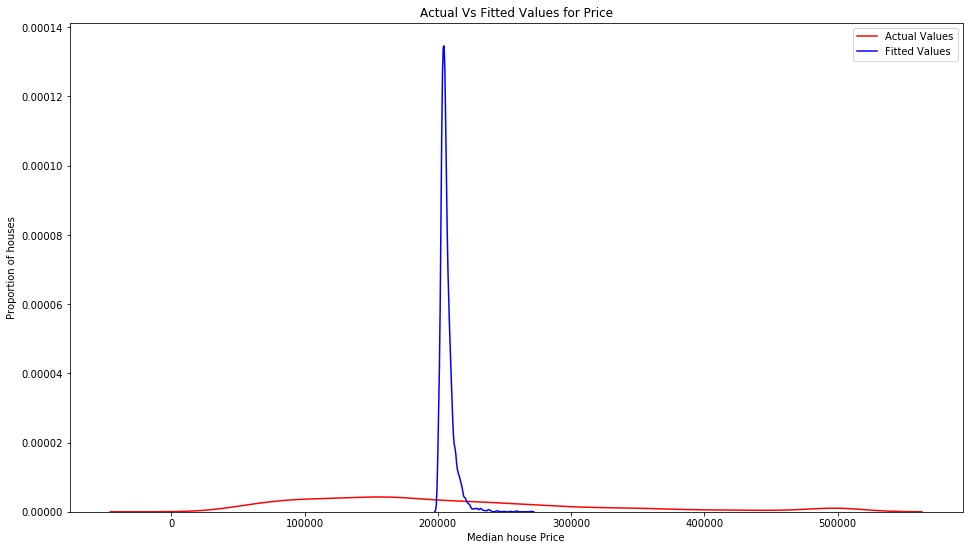

In [284]:
y_hat = lm.predict(sx_test)
model_evaluate_dist_plot(y_test, y_hat)

LOL. Very Bad Predictor again.

In [285]:
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as sfm

model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          1.439e+04
Date:                Fri, 06 Mar 2020   Prob (F-statistic):                        0.00
Time:                        21:38:00   Log-Likelihood:                     -2.0763e+05
No. Observations:               16512   AIC:                                  4.153e+05
Df Residuals:                   16500   BIC:                                  4.154e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                   -760.5371    131.210     -5.796      0.000   -1017.723    -503.351
latitude                   -1739.5737    433.248     -4.015      0.000   -2588.787    -890.360
housing_median_age          1148.0709     49.460     23.212      0.000    1051.124    1245.018
total_rooms                   -5.9458      0.862     -6.894      0.000      -7.636      -4.255
total_bedrooms                56.5576      6.559      8.622      0.000      43.700      69.415
population                   -37.2359      1.173    -31.750      0.000     -39.535     -34.937
households                    97.0332      7.305     13.283      0.000      82.715     111.351
median_income               3.974e+04    373.308    106.447      0.000     3.9e+04    4.05e+04
ocean_proximity_INLAND     -6.597e+04   1589.281    -41.507      0.000   -6.91e+04   -6.29e+04
ocean_proximity_ISLAND      1.743e+05   3.13e+04      5.563      0.000    1.13e+05    2.36e+05
ocean_proximity_NEAR BAY    7198.5811   2118.889      3.397      0.001    3045.329    1.14e+04
ocean_proximity_NEAR OCEAN  1.193e+04   1745.135      6.839      0.000    8514.297    1.54e+04
==============================================================================
Omnibus:                     4029.345   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14573.909
Skew:                           1.196   Prob(JB):                         0.00
Kurtosis:                       6.932   Cond. No.                     2.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

STRANGE! The OLS statsmodel shows 91% of the variance is getting explained by the model.

<h2 id="model2_mlr">Model #2. Multiple Linear Regresion</h2>

In [286]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("Intercept:", lm.intercept_)
print("Coeffs:", np.round(lm.coef_, 2))


Intercept: -2252421.143756755
Coeffs: [-2.6682100e+04 -2.5480440e+04  1.0618100e+03 -4.8200000e+00
  7.1960000e+01 -3.7940000e+01  7.5270000e+01  3.8686360e+04
 -3.9679460e+04  1.5557644e+05 -3.6757600e+03  3.1830100e+03]


<h2 id="model_evaluate">Model Evaluation</h2>

### Distribution Plot b/w Actual and Predicted

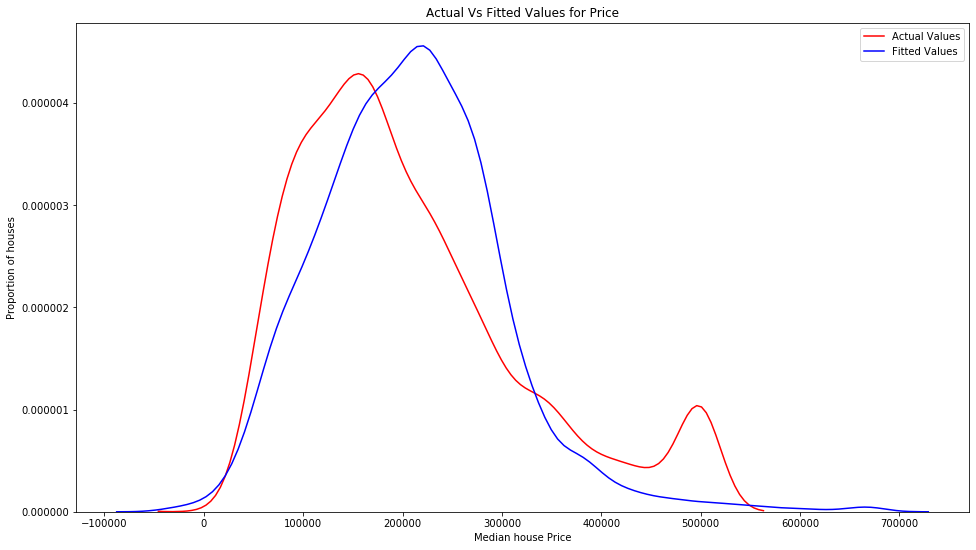

In [287]:
y_hat = lm.predict(x_test)
model_evaluate_dist_plot(y_test, y_hat)

From the above distribution, the over all fitting looks good but b/w 200000 and 300000 the model is not performing well. and also around 500000, the model is really poor.

### In Sample Evaluation Using R-Square

In [288]:
print("R-Square on Train", lm.score(x_train, y_train))
print("R-Square on Test", lm.score(x_test, y_test))

R-Square on Train 0.644608307084168
R-Square on Test 0.6484852997064519


We say 64.4% percent of the variance in house prices explained by the model.

### In Sample Evaluation Using Mean Squared Error

In [289]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error:", mse)

Mean Squared Error: 4634813376.522702


<h3 id="model3_poly">Model #3. Polynomial Regression With Pipelining </h3>

In [358]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


# create polynomial features of degree 2.
input = [('polynomial', PolynomialFeatures(degree=3, include_bias = False)), ('model', LinearRegression())]

pipe = Pipeline(input)
pipe

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [359]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [360]:
y_hat_pipe = pipe.predict(x_test)
y_hat_pipe[0:4]

array([146370.03782332, 207489.27226448, 140983.85297477, 206780.61089581])

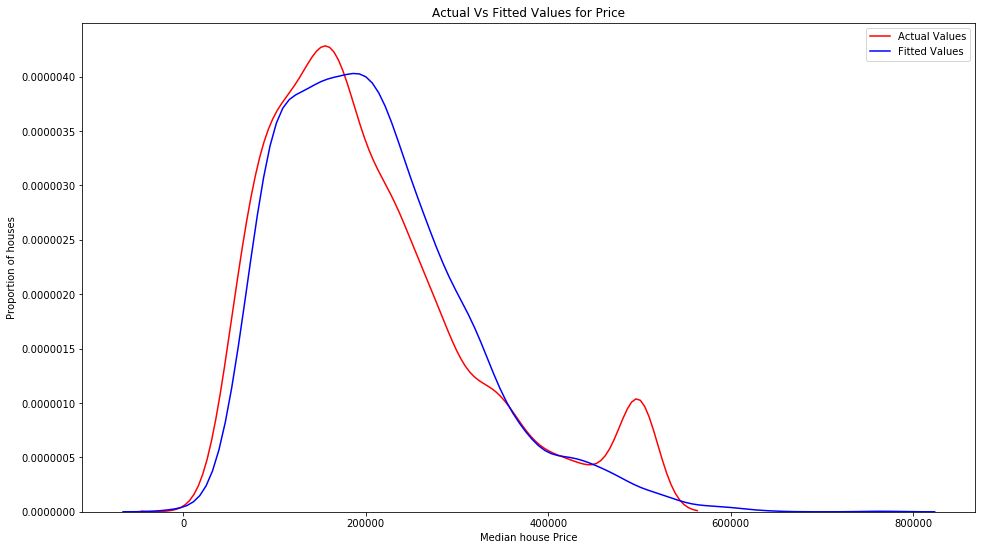

In [361]:
model_evaluate_dist_plot(y_test, y_hat_pipe)

In [362]:
print("R-Squared on Train:", pipe.score(x_train, y_train))
print("R-Squared on Test:", pipe.score(x_test, y_test))

print("Mean Squared Error from Polynomial:", mean_squared_error(y_test, y_hat_pipe))

R-Squared on Train: 0.7734505403784085
R-Squared on Test: 0.7490469903795676
Mean Squared Error from Polynomial: 3308881150.3362317


From this clearly there is some improvement from Multiple Linear Regression to Polynomial Regression.
- With Multiple Linear Regression, the model could only explain 64.4% of the variance in Medain House Value.
- With Polynomial Regression of degree 3, the model could explain around 74% of the variance in the Median House Value. This is clearly an improvement.

Since we have lot of multicollinearity in the data, lets go for fitting using RidgeRegression. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. Ridge Regression reduces the standard errors by adding the degree of bias to the regression estimates. 

Since we got good improvement with Polynomial Regression with degree of 3, we will use the Polynomial Features with Degree3 and we will fit the RidgeRegression on these Polynomial Features.

In [363]:
pf = PolynomialFeatures(degree = 3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [364]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(x_train_pr, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29479e-21): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [365]:
y_hat_ridge = ridge_model.predict(x_test_pr)

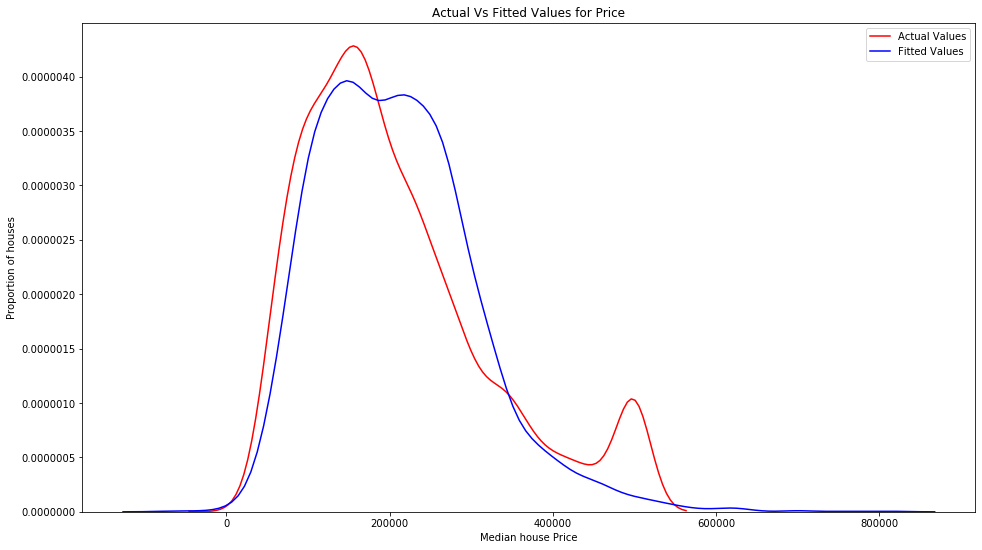

In [366]:
model_evaluate_dist_plot(y_test, y_hat_ridge)

In [367]:
print("R-Squared on Train Using Ridge Regression:", ridge_model.score(x_train_pr, y_train))
print("R-Squared on Test Using Ridge Regression:", ridge_model.score(x_test_pr, y_test))

print("Mean Squared Error from Polynomial:", mean_squared_error(y_test, y_hat_ridge))

R-Squared on Train Using Ridge Regression: 0.7075382248345077
R-Squared on Test Using Ridge Regression: 0.6999311062444096
Mean Squared Error from Polynomial: 3956486944.9140005


Lets try with different alphas.

In [368]:
Rsqu_test = []
Rsqu_train = []

ALPHA = 10 * np.arange(0, 1000)
for alfa in ALPHA:
    ridge = Ridge(alpha = alfa)
    ridge.fit(x_train_pr, y_train)
    Rsqu_test.append(ridge.score(x_test_pr, y_test))
    Rsqu_train.append(ridge.score(x_train_pr, y_train))


C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29313e-19): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58395e-19): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.87315e-19): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16116e-19): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.44828e-19): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.73472e-19): 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.63234e-18): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.77485e-18): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.91739e-18): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.05997e-18): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.20257e-18): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.34521e-18): 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43561e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44996e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4643e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47865e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.493e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50735e-17): res

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11157e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12599e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14041e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15483e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16926e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18368e-17): 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81972e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8342e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84868e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86317e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.87765e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89214e-17): r

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.63237e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.64691e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.66145e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.676e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.69054e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.70508e-17): re

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43338e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.44793e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46247e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47701e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.49155e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.5061e-17): r

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.16095e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.17551e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.19007e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.20464e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.2192e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.23376e-17): r

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.88944e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90402e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.9186e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93318e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94775e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.96233e-17): r

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.61865e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.63324e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.64783e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.66242e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.67701e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.6916e-17): r

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.4506e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.46519e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.47979e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.49439e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.50899e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52359e-17): r

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.16613e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.18073e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.19534e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.20995e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.22455e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.23916e-17): 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.85272e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.86733e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88194e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.89655e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.91116e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.92577e-17): 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.6418e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.65642e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.67103e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68565e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.70026e-17): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.71488e-17): r

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03872e-16): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04018e-16): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04164e-16): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04311e-16): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04457e-16): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04603e-16): 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10742e-16): result may not be accurate.
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10889e-16): result may not be accurate.
  overwrite_a=True).T


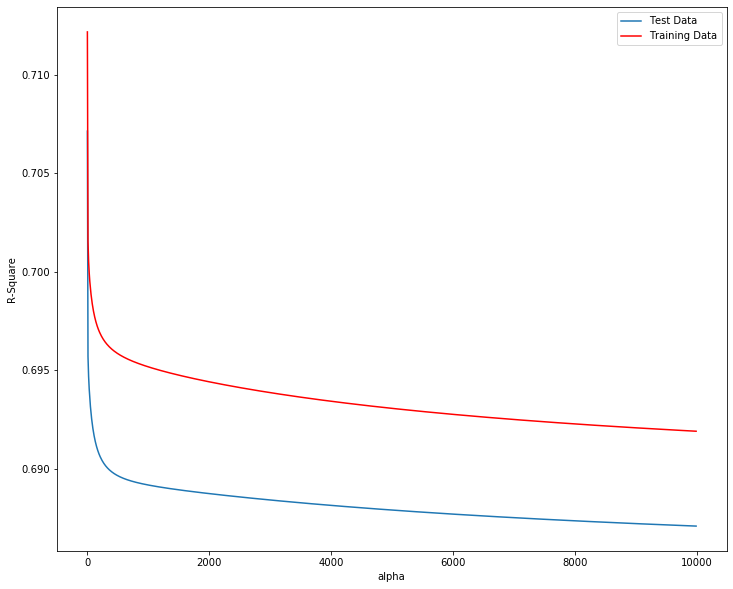

In [369]:
# We can plot the R-square values.
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALPHA,Rsqu_test, label='Test Data')
plt.plot(ALPHA,Rsqu_train, 'r', label='Training Data')
plt.xlabel('alpha')
plt.ylabel('R-Square')
plt.legend()
plt.show()
plt.close()

For the larger alpha values the model performance is getting decreased. For the alpha = 0.1 the model shows good performance both for the test and train. As the alpha goes larger, the overfitting is observed. We could use the GridSearchCV for finding the best parameter. But just for learning purposes I have just used this approach. And we will use the GridSearchCV later for the `DecisionTreeRegressor` and `RandomForestRegressor`.

<h3 id="model4_dstr">Model #4. Decision Tree Regressor</h3>

In [370]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

hyperparameters= { 'max_depth' : range(4, 15)}


regressor = DecisionTreeRegressor(random_state = 100)
clf = GridSearchCV(estimator = regressor, param_grid = hyperparameters, cv = 10)
clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=100,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(4, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

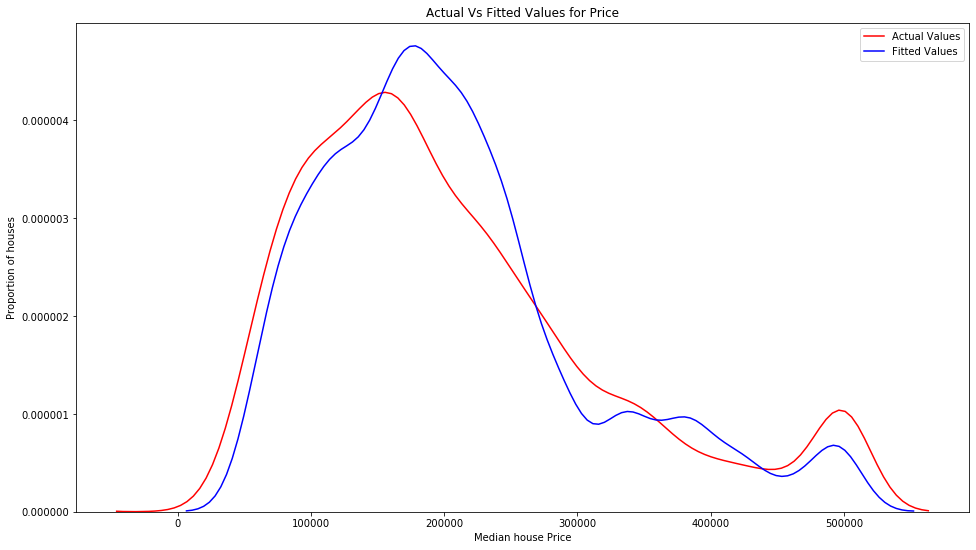

In [371]:
y_hat_dtr = clf.predict(x_test)
model_evaluate_dist_plot(y_test, y_hat_dtr)

In [372]:
print("Best Params:", clf.best_params_)
print("Best Estimators:", clf.best_estimator_)

Best Params: {'max_depth': 9}
Best Estimators: DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')


In [376]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat_dtr)
print("Decision Tree Regressor R-Square:", clf.score(x_test, y_test))
print("Decision Tree Regressor Mean Squared Error:", mean_squared_error(y_test, y_hat_dtr))
print("Decision Tree Regressor Root Mean Squared Error:", np.sqrt(mse))

Decision Tree Regressor R-Square: 0.7053061212944154
Decision Tree Regressor Mean Squared Error: 3885615963.893935
Decision Tree Regressor Root Mean Squared Error: 62334.70914261119


#### Decision Tree Max Depth Performance

In [377]:
max_depths = range(5, 12)

training_scores = []
test_scores = []

for depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state = 101)
    regressor.fit(x_train, y_train)
    test_scores.append(regressor.score(x_test, y_test))
    training_scores.append(regressor.score(x_train, y_train))


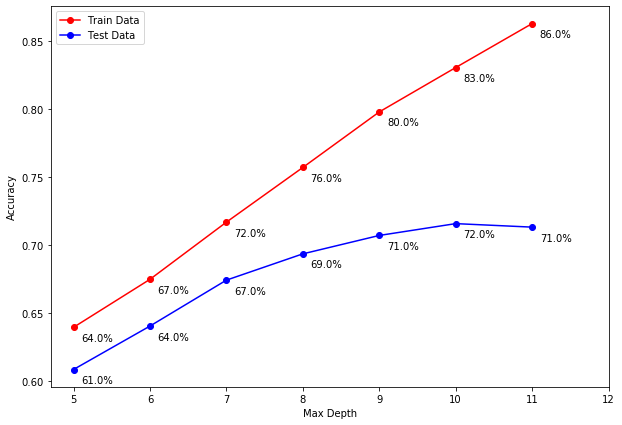

In [378]:
# Lets plot the scores against the max_depth
plt.figure(figsize = (10, 7))
ax1 = plt.plot(max_depths, training_scores, 'ro-', label = "Train Data")
plt.plot(max_depths, test_scores, 'bo-', label = "Test Data")
plt.xlabel('Max Depth')
plt.xticks(ticks = range(5, 13))
plt.ylabel('Accuracy')
for i in range(len(max_depths)):
    text_train = '{}%'.format(round(training_scores[i], 2) * 100)
    plt.text(max_depths[i] + 0.1, training_scores[i] - 0.01, text_train)
    
    text_test = '{}%'.format(round(test_scores[i], 2) * 100)
    plt.text(max_depths[i] + 0.1, test_scores[i] - 0.01, text_test)
    
    # print((max_depths[i], training_scores[i], test_scores[i]))

plt.legend()
plt.show()
plt.close()

We can see that with the Decision Tree Regressor it is overfitting. Because with train the accuracy is more at the max depth 11 and for test data it is at 0.72 which is 72%.

In [321]:
import pydotplus
from sklearn.tree import export_graphviz # Visualising Tree
regressor = DecisionTreeRegressor(max_depth = 10)
regressor.fit(x_train, y_train)
export_graphviz(regressor, out_file = 'tree.odt', feature_names = x_train.columns, filled = True)
graph = pydotplus.graph_from_dot_file('tree.odt')
graph.write_jpg('credit_tree.jpg')


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.269136 to fit



True

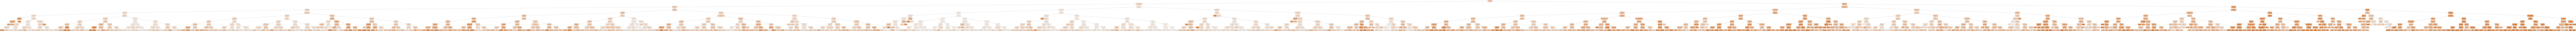

In [322]:
from IPython.display import Image
Image("credit_tree.jpg")

<h2 id="model5_rfr">Model #5. Random Forest Regressor</h2>

In [379]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib


pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))
pipeline

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [380]:
# Hyper parameters 
hyperparameters= { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'], 
                  'randomforestregressor__max_depth' : [None, 5, 3, 1]}
hyperparameters

{'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
 'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [381]:
# Tune Model Using Cross-Validation Pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split

In [382]:
# Evaluate Model Pipeline on test data
y_pred_rfr = clf.predict(x_test)

R2 Score: 0.8159261170623497
Mean Squared Error: 2427062351.0067596
Root Mean Squared Error: 49265.224560604205


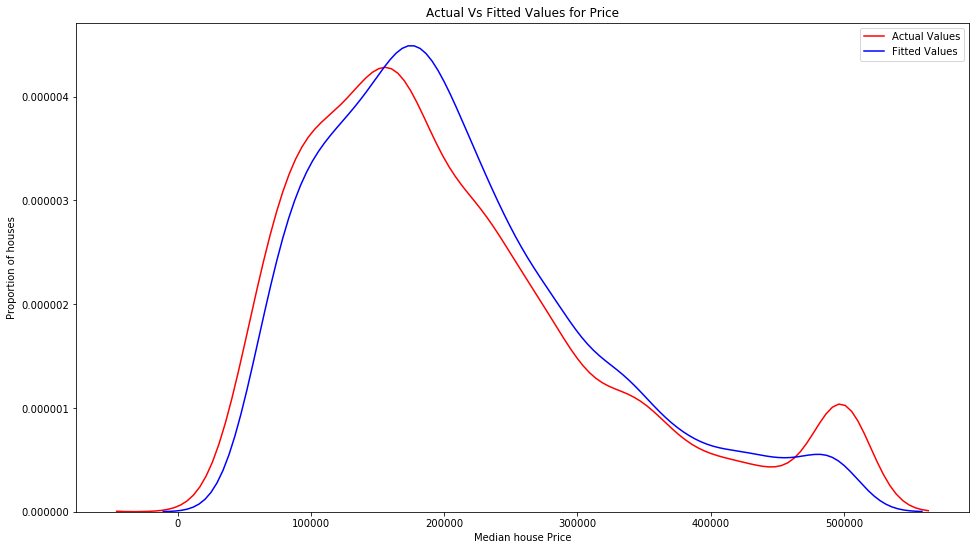

In [383]:
print("R2 Score:", r2_score(y_test, y_pred_rfr))
mse = mean_squared_error(y_test, y_pred_rfr)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
model_evaluate_dist_plot(y_test, y_pred_rfr)

With Random Forest Regressor we got good accuracy upto 81% of the variance in Median House Price is explained by the model. Good Model finally! Lets look at the best parameters and estimators.

In [388]:
print("Random Forest Regressor Best Parameters:", clf.best_params_)
print("Random Forest Regressor Best Estimators:", clf.best_estimator_)

Random Forest Regressor Best Parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto'}
Random Forest Regressor Best Estimators: Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                     

<h2 id="bonus">Bonus Exercise-Linear Regression With One Independent Variable</h2>

Text(0.5, 0, 'Median Income')

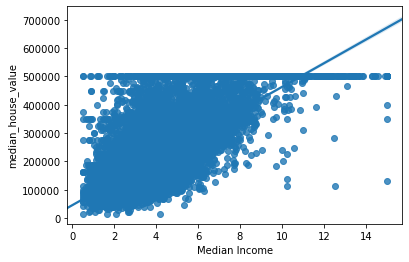

In [386]:
x_train_median_income = x_train[['median_income']]
x_test_median_income = x_test[['median_income']]

sns.regplot(x_train_median_income, y_train)
plt.xlabel('Median Income')

R-Square: 0.47502749513807685
Mean Squared Error: 55972567402.549194


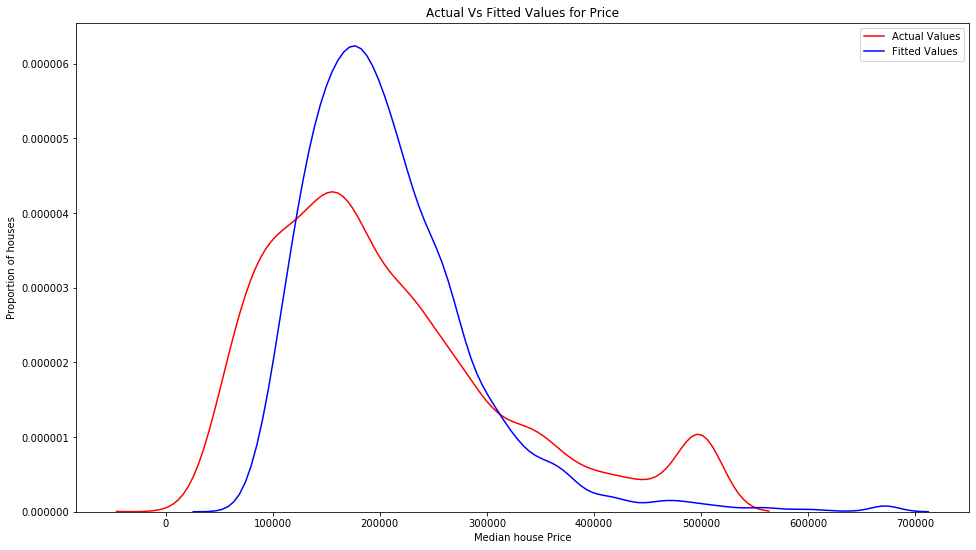

In [387]:
lm = LinearRegression()
lm.fit(x_train_median_income, y_train)
print("R-Square:", lm.score(x_test_median_income, y_test))
print("Mean Squared Error:", mean_squared_error(x_test_median_income, y_test))
model_evaluate_dist_plot(y_test, lm.predict(x_test_median_income))